## Practical Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  classification_report


# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow as tf




# from sklearn.preprocessing import LabelEncoder

### Exploratory Data Analysis

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None

First few rows of Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1 

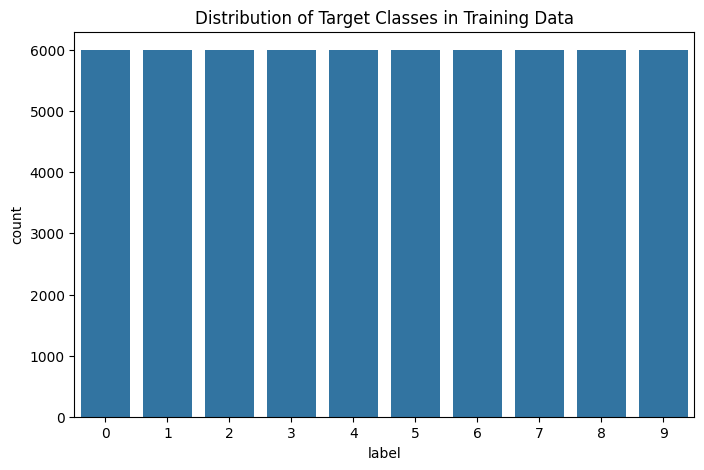

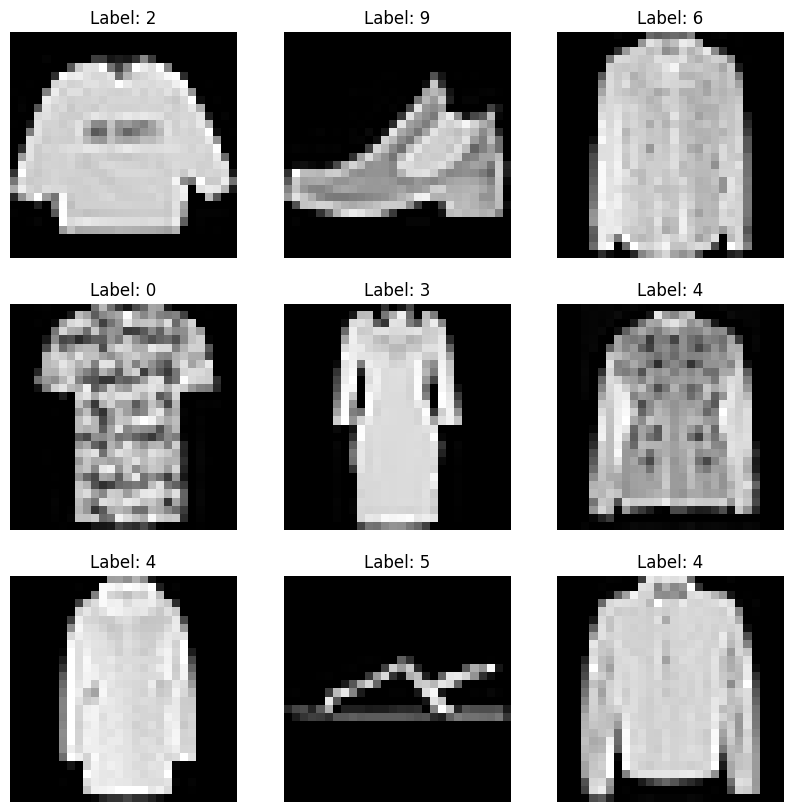

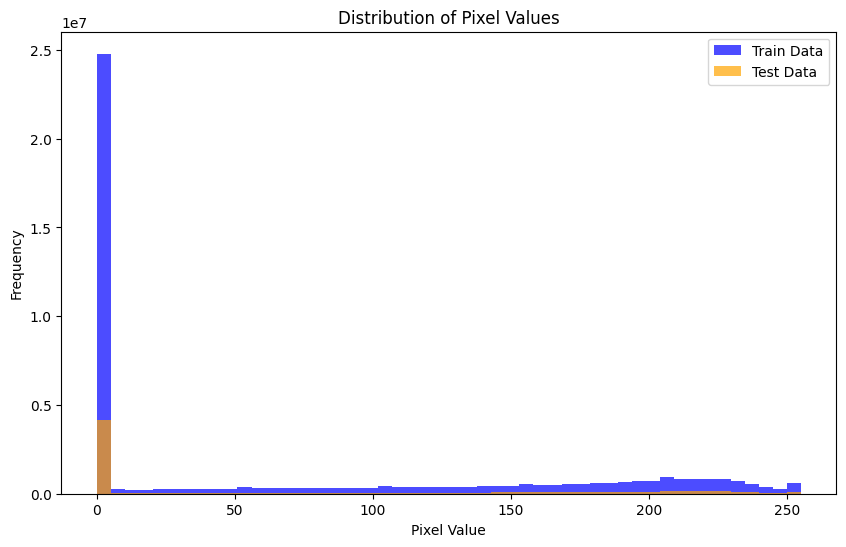

In [77]:

# Load the training and test datasets
train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")


# Display basic information about the datasets
print("Training Data:")
print(train_data.info())

print("\nTest Data:")
print(test_data.info())

# Display the first few rows of the datasets
print("\nFirst few rows of Training Data:")
print(train_data.head())

print("\nFirst few rows of Test Data:")
print(test_data.head())

# Distribution of target classes in the training set
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Target Classes in Training Data')
plt.show()

# Display a few images from the dataset
def display_images(data, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        image = data.iloc[i, 1:].values.reshape(28, 28).astype(np.uint8)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {data.iloc[i, 0]}")
        plt.axis('off')
    plt.show()

# Display a few images from the training set
display_images(train_data)

# Visualize the distribution of pixel values
plt.figure(figsize=(10, 6))
plt.hist(train_data.iloc[:, 1:].values.flatten(), bins=50, color='blue', alpha=0.7, label='Train Data')
plt.hist(test_data.iloc[:, 1:].values.flatten(), bins=50, color='orange', alpha=0.7, label='Test Data')
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Training a Sequential model using Keras and Tensorflow, with plots showing the Epoch against the accuracy and the Epoch against the loss

Epoch 1/10
750/750 - 4s - loss: 0.5493 - accuracy: 0.8078 - val_loss: 0.4415 - val_accuracy: 0.8410 - 4s/epoch - 6ms/step
Epoch 2/10
750/750 - 3s - loss: 0.3979 - accuracy: 0.8568 - val_loss: 0.3779 - val_accuracy: 0.8637 - 3s/epoch - 4ms/step
Epoch 3/10
750/750 - 5s - loss: 0.3541 - accuracy: 0.8715 - val_loss: 0.3652 - val_accuracy: 0.8610 - 5s/epoch - 6ms/step
Epoch 4/10
750/750 - 4s - loss: 0.3299 - accuracy: 0.8783 - val_loss: 0.3274 - val_accuracy: 0.8809 - 4s/epoch - 5ms/step
Epoch 5/10
750/750 - 3s - loss: 0.3076 - accuracy: 0.8866 - val_loss: 0.3295 - val_accuracy: 0.8805 - 3s/epoch - 4ms/step
Epoch 6/10
750/750 - 4s - loss: 0.2922 - accuracy: 0.8927 - val_loss: 0.3584 - val_accuracy: 0.8727 - 4s/epoch - 5ms/step
Epoch 7/10
750/750 - 4s - loss: 0.2787 - accuracy: 0.8976 - val_loss: 0.3300 - val_accuracy: 0.8786 - 4s/epoch - 5ms/step
Epoch 8/10
750/750 - 4s - loss: 0.2666 - accuracy: 0.9016 - val_loss: 0.3198 - val_accuracy: 0.8810 - 4s/epoch - 5ms/step
Epoch 9/10
750/750 - 4s 

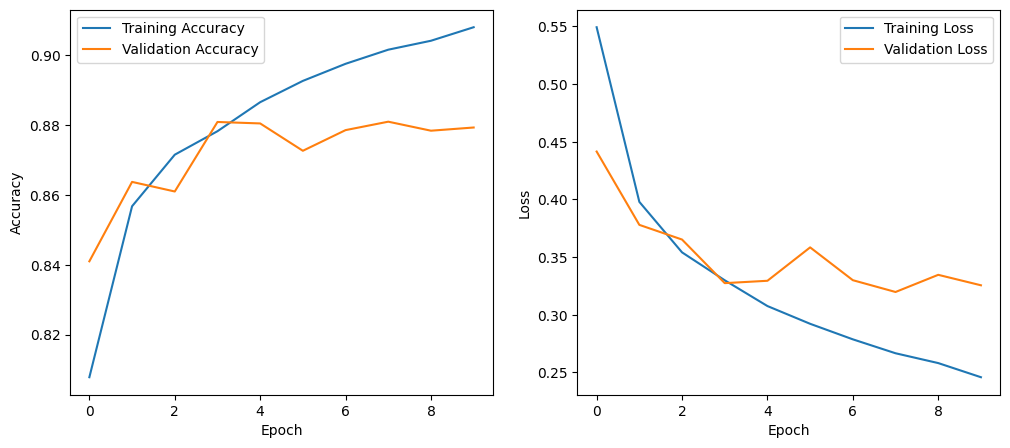

In [78]:

# Split the training data into features (X) and labels (y)
X = train_data.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normalize pixel values
y = to_categorical(train_data['label'].values)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model on the test set
X_test = test_data.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normalize pixel values
y_test = to_categorical(test_data['label'].values)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Evaluating the model using the validation dataset

In [79]:

y_val_pred_probs = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
y_val_true = np.argmax(y_val, axis=1)


# Print classification report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

# Convert predicted probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Convert one-hot encoded labels to class labels for the true values
y_val_true = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy_val = accuracy_score(y_val_true, y_val_pred)

# Calculate precision, recall, and F1 score
precision_val = precision_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
recall_val = recall_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
f1_val = f1_score(y_val_true, y_val_pred, average='weighted', zero_division=1)

# Print the metrics
print(f"Accuracy on Validation Set: {accuracy_val * 100:.2f}%")
print(f"Precision on Validation Set: {precision_val}")
print(f"Recall on Validation Set: {recall_val}")
print(f"F1 Score on Validation Set: {f1_val}")

# Confusion matrix for more detailed analysis
conf_mat_val = confusion_matrix(y_val_true, y_val_pred)
print("\nConfusion Matrix for Validation Set:")
print(conf_mat_val)


375/375 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1232
           1       0.98      0.97      0.98      1174
           2       0.84      0.78      0.81      1200
           3       0.86      0.92      0.89      1242
           4       0.76      0.84      0.80      1185
           5       0.95      0.97      0.96      1141
           6       0.69      0.70      0.70      1243
           7       0.96      0.92      0.94      1224
           8       0.97      0.97      0.97      1149
           9       0.94      0.96      0.95      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Accuracy on Validation Set: 87.93%
Precision on Validation Set: 0.88076236656018
Recall on Validation Set: 0.8793333333333333
F1 Score on Validation Set: 0.8793053

### Running the model on the test data set

In [80]:
# Evaluate the model on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Print classification report for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test_true, y_test_pred))

# Perform predictions on the test set
y_test_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Convert one-hot encoded labels to class labels for the true values
y_test_true = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy_test = accuracy_score(y_test_true, y_test_pred)
precision_test = precision_score(y_test_true, y_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y_test_true, y_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y_test_true, y_test_pred, average='weighted', zero_division=1)

# Confusion matrix for more detailed analysis
conf_mat_test = confusion_matrix(y_test_true, y_test_pred)

# Print the metrics
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")
print(f"Precision on Test Set: {precision_test}")
print(f"Recall on Test Set: {recall_test}")
print(f"F1 Score on Test Set: {f1_test}")

# Print the confusion matrix
print("\nConfusion Matrix for Test Set:")
print(conf_mat_test)


313/313 [==============================] - 1s 2ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1000
           1       0.98      0.99      0.98      1000
           2       0.86      0.78      0.82      1000
           3       0.88      0.92      0.90      1000
           4       0.79      0.88      0.83      1000
           5       0.96      0.95      0.96      1000
           6       0.71      0.73      0.72      1000
           7       0.95      0.90      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

313/313 [==============================] - 1s 3ms/step
Accuracy on Test Set: 88.67%
Precision on Test Set: 0.8881747346555229
Recall on Test Set: 0.886

Conclusion on the test above: The scores shown above indicates that the model shows an 88.67% accuracy with a precision score of 0.89, recall score of 0.89 and an F1 score of 0.89 indicating that the model performs relatively well


### If we increase the precision for class '5' without changing the model

In [81]:
class_to_adjust = 5
desired_precision = 0.90 

# Find the threshold that achieves the desired precision for class '5'
threshold = 0.5 
while True:
    y_test_pred_adjusted = (y_test_pred_probs[:, class_to_adjust] > threshold).astype(int)
    precision_adjusted = np.sum((y_test_true == class_to_adjust) & (y_test_pred_adjusted == 1)) / np.sum(y_test_pred_adjusted)

    if precision_adjusted >= desired_precision or threshold <= 0:
        break

    threshold -= 0.01 


# Apply the final adjusted threshold to get the modified predictions
y_test_pred_adjusted = (y_test_pred_probs[:, class_to_adjust] > threshold).astype(int)

# Print the updated classification report and metrics for class '5'
print("Updated Classification Report for Class '5':")
print(classification_report(y_test_true, y_test_pred_adjusted, zero_division=1))

# Print the updated confusion matrix for class '5'
conf_mat_adjusted = confusion_matrix(y_test_true, y_test_pred_adjusted)
print("\nUpdated Confusion Matrix for Class '5':")
print(conf_mat_adjusted)



# Calculate and print updated accuracy, precision, recall, F1 score for class '5'
accuracy_adjusted = np.sum(np.diag(conf_mat_adjusted)) / np.sum(conf_mat_adjusted)
precision_denominator = np.sum(conf_mat_adjusted, axis=0)

# Avoid division by zero by checking for zero denominators
precision_adjusted = np.divide(np.diag(conf_mat_adjusted).astype(float), precision_denominator.astype(float), out=np.zeros_like(precision_denominator).astype(float), where=(precision_denominator != 0))
recall_adjusted = np.diag(conf_mat_adjusted).astype(float) / np.sum(conf_mat_adjusted, axis=1).astype(float)


# Handle cases where both precision and recall are zero
with np.errstate(divide='ignore', invalid='ignore'):
    f1_score_denominator = precision_adjusted + recall_adjusted
    f1_score_adjusted = np.where(f1_score_denominator == 0, 0.0, 2 * (precision_adjusted * recall_adjusted) / f1_score_denominator)

# Print updated metrics for class '5'
print("\nUpdated Metrics for Class '5':")
print(f"Updated Accuracy: {accuracy_adjusted * 100:.2f}%")
print(f"Updated Precision: {precision_adjusted}")
print(f"Updated Recall: {recall_adjusted}")
print(f"Updated F1 Score: {f1_score_adjusted}")



Updated Classification Report for Class '5':
              precision    recall  f1-score   support

           0       0.11      1.00      0.20      1000
           1       0.00      0.00      1.00      1000
           2       1.00      0.00      0.00      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000
           5       1.00      0.00      0.00      1000
           6       1.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       1.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.81      0.10      0.12     10000
weighted avg       0.81      0.10      0.12     10000


Updated Confusion Matrix for Class '5':
[[ 999    1    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0   

### If we increase the recall for class '5' without changing the model

In [82]:
class_to_adjust = 5
desired_recall = 0.90 

# Find the threshold that achieves the desired recall for class '5'
threshold = 0.5 
while True:
    y_test_pred_adjusted = (y_test_pred_probs[:, class_to_adjust] > threshold).astype(int)
    recall_adjusted = np.sum((y_test_true == class_to_adjust) & (y_test_pred_adjusted == 1)) / np.sum(y_test_true == class_to_adjust)

    if recall_adjusted >= desired_recall or threshold >= 1.0:
        break

    threshold += 0.01

# Apply the final adjusted threshold to get the modified predictions
y_test_pred_adjusted = (y_test_pred_probs[:, class_to_adjust] > threshold).astype(int)


# Print the updated classification report and metrics for class '5'
print("Updated Classification Report for Class '5':")
print(classification_report(y_test_true, y_test_pred_adjusted, zero_division=1))  

# Print the updated confusion matrix for class '5'
conf_mat_adjusted = confusion_matrix(y_test_true, y_test_pred_adjusted)
print("\nUpdated Confusion Matrix for Class '5':")
print(conf_mat_adjusted)


# Calculate and print updated accuracy, precision, recall, F1 score for class '5'
accuracy_adjusted = np.sum(np.diag(conf_mat_adjusted)) / np.sum(conf_mat_adjusted)
precision_denominator = np.sum(conf_mat_adjusted, axis=0)

# Avoid division by zero by checking for zero denominators
precision_adjusted = np.divide(np.diag(conf_mat_adjusted).astype(float), precision_denominator.astype(float), out=np.zeros_like(precision_denominator).astype(float), where=(precision_denominator != 0))
recall_adjusted = np.diag(conf_mat_adjusted).astype(float) / np.sum(conf_mat_adjusted, axis=1).astype(float)

# Handle cases where both precision and recall are zero
with np.errstate(divide='ignore', invalid='ignore'):
    f1_score_denominator = precision_adjusted + recall_adjusted
    f1_score_adjusted = np.where(f1_score_denominator == 0, 0.0, 2 * (precision_adjusted * recall_adjusted) / f1_score_denominator)

# Print updated metrics for class '5'
print("\nUpdated Metrics for Class '5':")
print(f"Updated Accuracy: {accuracy_adjusted * 100:.2f}%")
print(f"Updated Precision: {precision_adjusted}")
print(f"Updated Recall: {recall_adjusted}")
print(f"Updated F1 Score: {f1_score_adjusted}")



Updated Classification Report for Class '5':
              precision    recall  f1-score   support

           0       0.11      1.00      0.20      1000
           1       0.00      0.00      1.00      1000
           2       1.00      0.00      0.00      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000
           5       1.00      0.00      0.00      1000
           6       1.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       1.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.81      0.10      0.12     10000
weighted avg       0.81      0.10      0.12     10000


Updated Confusion Matrix for Class '5':
[[ 999    1    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0   